# Stock Market prediction with machine learning and python

The stock market is a complex system that is influenced by a multitude of factors, making it difficult to predict future prices accurately. However, with the help of machine learning algorithms, we can analyze large amounts of historical data and use it to make informed predictions about future market trends.

In this project, we will be using Python to build a machine learning model that can predict stock prices based on historical data. We will begin by collecting and cleaning our data, selecting relevant features, and then used Random forest regression to predict the days that the market will go up.

After that, I applied a backtest to reach more concise results by setting a custom threshold so if it's greater than 60% chance that the price will go up, the model will go up. This reduced the days that the price will go up, but increase the chance of it.

In [3]:
pip install yfinance

  Using cached yfinance-0.2.18-py2.py3-none-any.whl (60 kB)
  Using cached frozendict-2.3.7-cp39-cp39-win_amd64.whl (35 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf

In [5]:
sp500 = yf.Ticker('^GSPC')

In [8]:
sp500 = sp500.history(period='max')

In [9]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-04-17 00:00:00-04:00,4137.169922,4151.720215,4123.180176,4151.319824,3611180000,0.0,0.0
2023-04-18 00:00:00-04:00,4164.259766,4169.479980,4140.359863,4154.870117,3536640000,0.0,0.0
2023-04-19 00:00:00-04:00,4139.330078,4162.569824,4134.490234,4154.520020,3572560000,0.0,0.0


In [11]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-04-10 00:00:00-04:00', '2023-04-11 00:00:00-04:00',
               '2023-04-12 00:00:00-04:00', '2023-04-13 00:00:00-04:00',
               '2023-04-14 00:00:00-04:00', '2023-04-17 00:00:00-04:00',
               '2023-04-18 00:00:00-04:00', '2023-04-19 00:00:00-04:00',
               '2023-04-20 00:00:00-04:00', '2023-04-21 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23941, freq=None)

## Cleaning and visualizing the market data

<AxesSubplot:xlabel='Date'>

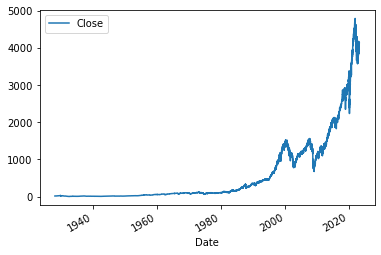

In [13]:
sp500.plot.line(y='Close', use_index=True)

In [14]:
del sp500['Dividends']
del sp500['Stock Splits']
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2023-04-17 00:00:00-04:00,4137.169922,4151.720215,4123.180176,4151.319824,3611180000
2023-04-18 00:00:00-04:00,4164.259766,4169.479980,4140.359863,4154.870117,3536640000
2023-04-19 00:00:00-04:00,4139.330078,4162.569824,4134.490234,4154.520020,3572560000


## Setting up target for machine learning

In [15]:
sp500['Tomorrow'] = sp500['Close'].shift(-1) #Took the close column and shifted the prices back 1 day
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-04-17 00:00:00-04:00,4137.169922,4151.720215,4123.180176,4151.319824,3611180000,4154.870117
2023-04-18 00:00:00-04:00,4164.259766,4169.479980,4140.359863,4154.870117,3536640000,4154.520020
2023-04-19 00:00:00-04:00,4139.330078,4162.569824,4134.490234,4154.520020,3572560000,4129.790039


In [18]:
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-04-17 00:00:00-04:00,4137.169922,4151.720215,4123.180176,4151.319824,3611180000,4154.870117,1
2023-04-18 00:00:00-04:00,4164.259766,4169.479980,4140.359863,4154.870117,3536640000,4154.520020,0
2023-04-19 00:00:00-04:00,4139.330078,4162.569824,4134.490234,4154.520020,3572560000,4129.790039,0


In [19]:
sp500 = sp500.loc['1990-01-01':].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-04-17 00:00:00-04:00,4137.169922,4151.720215,4123.180176,4151.319824,3611180000,4154.870117,1
2023-04-18 00:00:00-04:00,4164.259766,4169.479980,4140.359863,4154.870117,3536640000,4154.520020,0
2023-04-19 00:00:00-04:00,4139.330078,4162.569824,4134.490234,4154.520020,3572560000,4129.790039,0


## Training an initial machine learning model

In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=50, min_samples_split=50, random_state=1)

train = sp500.iloc[:-50]
test = sp500.iloc[-50:]

predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=50, n_estimators=50, random_state=1)

In [37]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [38]:
import pandas as pd

preds = pd.Series(preds, index=test.index)
preds

Date
2023-02-09 00:00:00-05:00    0
2023-02-10 00:00:00-05:00    1
2023-02-13 00:00:00-05:00    0
2023-02-14 00:00:00-05:00    0
2023-02-15 00:00:00-05:00    0
2023-02-16 00:00:00-05:00    0
2023-02-17 00:00:00-05:00    0
2023-02-21 00:00:00-05:00    0
2023-02-22 00:00:00-05:00    0
2023-02-23 00:00:00-05:00    0
2023-02-24 00:00:00-05:00    1
2023-02-27 00:00:00-05:00    0
2023-02-28 00:00:00-05:00    0
2023-03-01 00:00:00-05:00    1
2023-03-02 00:00:00-05:00    1
2023-03-03 00:00:00-05:00    0
2023-03-06 00:00:00-05:00    0
2023-03-07 00:00:00-05:00    0
2023-03-08 00:00:00-05:00    0
2023-03-09 00:00:00-05:00    0
2023-03-10 00:00:00-05:00    0
2023-03-13 00:00:00-04:00    0
2023-03-14 00:00:00-04:00    1
2023-03-15 00:00:00-04:00    0
2023-03-16 00:00:00-04:00    1
2023-03-17 00:00:00-04:00    0
2023-03-20 00:00:00-04:00    1
2023-03-21 00:00:00-04:00    0
2023-03-22 00:00:00-04:00    0
2023-03-23 00:00:00-04:00    0
2023-03-24 00:00:00-04:00    0
2023-03-27 00:00:00-04:00    0
202

In [39]:
precision_score(test['Target'], preds)

0.6

<AxesSubplot:xlabel='Date'>

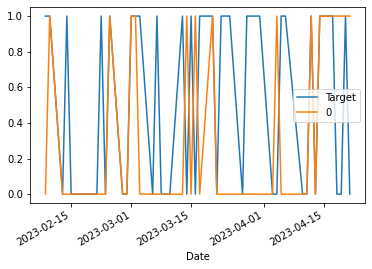

In [40]:
combined = pd.concat([test['Target'], preds], axis=1)
combined.plot()

## Building a backtesting system

In [44]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [47]:
#Step = average 250 trading days in a year. Start = 10 years of data

def backtest(data, model, predictors, start=2500, step=250): 
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [48]:
predictions = backtest(sp500, model, predictors)

In [49]:
predictions['Predictions'].value_counts()

0    3474
1    2417
Name: Predictions, dtype: int64

In [51]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5254447662391394

In [63]:
predictions['Target'].value_counts() / predictions.shape[0]

1    0.543967
0    0.456033
Name: Target, dtype: float64

In [52]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages= sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500['Close'] / rolling_averages['Close']
    
    trend_column = f"trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()['Target']
    
    new_predictors += [ratio_column, trend_column]

In [53]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,trend_2,Close_Ratio_5,trend_5,Close_Ratio_60,trend_60,Close_Ratio_250,trend_250,Close_Ratio_1000,trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17 00:00:00-04:00,4137.169922,4151.720215,4123.180176,4151.319824,3611180000,4154.870117,1,1.001650,1.0,1.005841,2.0,1.028371,32.0,1.046227,115.0,1.115346,533.0
2023-04-18 00:00:00-04:00,4164.259766,4169.479980,4140.359863,4154.870117,3536640000,4154.520020,0,1.000427,2.0,1.004465,3.0,1.028477,32.0,1.047447,115.0,1.115937,533.0
2023-04-19 00:00:00-04:00,4139.330078,4162.569824,4134.490234,4154.520020,3572560000,4129.790039,0,0.999958,1.0,1.001351,3.0,1.027819,31.0,1.047680,115.0,1.115481,532.0


In [54]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,trend_2,Close_Ratio_5,trend_5,Close_Ratio_60,trend_60,Close_Ratio_250,trend_250,Close_Ratio_1000,trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-14 00:00:00-04:00,4140.109863,4163.189941,4113.200195,4137.640137,3575690000,4151.319824,1,0.998964,1.0,1.004581,2.0,1.026052,31.0,1.042527,114.0,1.112033,533.0
2023-04-17 00:00:00-04:00,4137.169922,4151.720215,4123.180176,4151.319824,3611180000,4154.870117,1,1.001650,1.0,1.005841,2.0,1.028371,32.0,1.046227,115.0,1.115346,533.0
2023-04-18 00:00:00-04:00,4164.259766,4169.479980,4140.359863,4154.870117,3536640000,4154.520020,0,1.000427,2.0,1.004465,3.0,1.028477,32.0,1.047447,115.0,1.115937,533.0


In [55]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,trend_2,Close_Ratio_5,trend_5,Close_Ratio_60,trend_60,Close_Ratio_250,trend_250,Close_Ratio_1000,trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-14 00:00:00-04:00,4140.109863,4163.189941,4113.200195,4137.640137,3575690000,4151.319824,1,0.998964,1.0,1.004581,2.0,1.026052,31.0,1.042527,114.0,1.112033,533.0
2023-04-17 00:00:00-04:00,4137.169922,4151.720215,4123.180176,4151.319824,3611180000,4154.870117,1,1.001650,1.0,1.005841,2.0,1.028371,32.0,1.046227,115.0,1.115346,533.0
2023-04-18 00:00:00-04:00,4164.259766,4169.479980,4140.359863,4154.870117,3536640000,4154.520020,0,1.000427,2.0,1.004465,3.0,1.028477,32.0,1.047447,115.0,1.115937,533.0


## Improving model

In [56]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [57]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [58]:
predictions = backtest(sp500, model, new_predictors)

In [59]:
predictions['Predictions'].value_counts()

0.0    4077
1.0     813
Name: Predictions, dtype: int64

In [61]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5694956949569495

## Next steps

Our precision score said that the market got up 56.9% of the time, while the went up 54.3% of the time. Not perfect but shows that the model have some predictive value